# In this model -- same adam, sigmoids, 12-6-6-6-1 structure
# Total sample size 10,000
# Training sample size 80% = 8,000, this is (whole) batch size
# (Mini) batch size = 100, hence no. of batches per epoch = 80
# Hence 80 iterations per epoch 
# (1 iteration = 1 forward pass + 1 backward pass)
# No. of epochs = 500, Total iterations = 500 x 80 = 40,000
# Prediction of Y=1 (exit from bank) or Y=0 (no exit): binary classification 

In [1]:
import json
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from keras import initializers

# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(5)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

C:\Users\kglim\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
#Loading Dataset
data = pd.read_csv("Churn_Modelling.csv")

In [4]:
#Generating Dependent Variable Vectors
Y = data.iloc[:,-1].values
X = data.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
#Generating Dependent Variable Vectors
Y = data.iloc[:,-1].values
X = data.iloc[:,3:13]
X['Gender']=X['Gender'].map({'Female':0,'Male':1})
### above is used instead of a more complicated package involving -- from sklearn.preprocessing import LabelEncoder
### converts Female -- 0, Male -- 1, i.e. hot-encoding categorical variables
print(Y) ### Y = 1 means exited bank, 0 means staying on with bank as customer
print (X['Gender'])

[1 0 1 ... 1 1 0]
0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64


In [6]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))
### Geography is transformed into France -- 1,0,0; Spain -- 0,0,1; Germany -- 0,1,0.
### Moreover -- this encoded vector of ones-zeros is now put in first 3 cols. Credit Score pushed to 4th col.

In [7]:
### convert X to dataframe X1
X1 = pd.DataFrame(X)
X1.head()
### Note there are 12 features including onehotencoder for the Geography feature-- 
### The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [8]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [9]:
print(Y_test[0:50])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 1 0 0 0 1 0 0 1 0 1 0 1 0]


In [10]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We call fit_transform() method on our training data and transform() method on our test data.
In sklearn.preprocessing.StandardScaler(), centering and scaling happens independently on each feature. 

The fit method is calculating the mean and variance of each of the features present in the data. The transform method is transforming all the features using the respective feature's mean and variance that are calculated in the statement
before on X_train.

X_train = sc.fit_transform(X_train) -- each feature in the X_train is scaled to mean 0, variance 1. 
X_test = sc.transform(X_test) -- each feature in X_test is scaled using sample mean, var of X_train features

In [11]:
### Check transformed data
import sys
#np.set_printoptions(threshold=sys.maxsize)
#print(X_train)
print(np.mean(X_train,axis=0)) ## print means of each feature, showing scaling working

[-2.89906987e-16 -2.86048962e-16 -5.30686606e-16 -2.17603713e-17
  4.79061235e-17 -6.23376351e-16 -5.14518983e-17 -4.18663715e-15
 -4.83973972e-16  7.27695681e-16 -5.93469718e-16  3.58962859e-15]


In [12]:
print(np.var(X_train,axis=0)) ## print means of each feature, showing scaling working

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
print(np.mean(X_test,axis=0)) ## print means of each feature, showing scaling working

[ 0.02150002 -0.03274686  0.00811563  0.01112925  0.01455712  0.0165023
 -0.0211389   0.00179946 -0.01435279 -0.0164785   0.03600953 -0.00461947]


In [14]:
print(np.var(X_test,axis=0)) ## print means of each feature, showing scaling working

[0.99960225 0.96186549 1.0094561  0.99757565 0.99720133 1.0179895
 1.02168564 1.00410934 0.96758663 1.01471752 0.99704644 0.98892999]


In [15]:
### This is the very first step while creating NNmodel. Here we are going to create our ann object by using a certain class of Keras 
### named Sequential. As a part of tensorflow 2.0, Keras is now integrated with tensorflow and is now considered as a 
### sub-library of tensorflow. The Sequential class is a part of the models module of Keras library which is a part of the 
### tensorflow library now. 
### It used to be "import tensorflow as tf; from tensorflow import keras; from tensorflow.keras import layers"
### See documentation at https://keras.io/guides/sequential_model/

#Initialising the NN model name -- NNmodel
NNmodel = tf.keras.models.Sequential()

In [16]:
### Creating a network that has 2 hidden layers together with 1 input layer and 1 output layer. 
#Adding First Hidden Layer
NNmodel.add(tf.keras.layers.Dense(units=6,activation="sigmoid"))
### units = 6 refer to 6 neurons in hidden layer 

Above -- first hidden layer is created using the Dense class which is part of the layers module. This class accepts 2 inputs:-
(1) units:- number of neurons that will be present in the respective layer (2) activation:- specify which activation function to be used. This example uses first input as 8. There is no correct answer which is the right number of neurons in the layer -- trial and error. Not too large to be computationally impractical or redundant; not too small to be ineffective.
For the second input, we try the sigmoid or logistic function as an activation function for hidden layers. We can also try “relu”[rectified linear unit].

In [17]:
### Creating 2nd hidden layer 
#Adding Second Hidden Layer -- note this is added sequentially to the first hidden layer
NNmodel.add(tf.keras.layers.Dense(units=6,activation="sigmoid"))
### units = 6 refer to 6 neurons in hidden layer 

In [18]:
### Creating 3rd hidden layer 
#Adding Second Hidden Layer -- note this is added sequentially to the first hidden layer
NNmodel.add(tf.keras.layers.Dense(units=6,activation="sigmoid"))
### units = 6 refer to 6 neurons in hidden layer 

In [19]:
### now we create the output layer -- this is added sequentially
#Adding Output Layer
NNmodel.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
### Only 1 output neuron

For a binary classification problem as above, actual case output is 1 or 0. Hence we require only one neuron to output layer - output could be estimated probability of case actual output = 1. For multiclass classification problem, if the output contains m categories then we need to create m different neurons, one for each category. In the binary output case, the suitable activation function is the sigmoid function. For multiclass classification problem, the activation function is typically softmax. The softmax function predicts a multinomial probability distribution.

In [20]:
### After creating the layers -- require compiling the NNmodel. Compiling allows the computer to run and understand the program 
### without the need of more fundamental steps in the programming. Compiling adds other elements or linking other libraries, and optimization,
### such that after compiling the results are readily computed e.g. in a binary executable program as an output. 
#Compiling NNmodel
NNmodel.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
### Note optimizer here is a more sophisticated version of the Mean Square loss

Compile method above accepts inputs: (1) optimizer:- specifies which optimizer to be used in order to perform stochastic gradient descent (2) error/loss function, e.g., 'binary_crossentropy' here. For multiclass classification, it should be categorical_crossentropy, (3) metrics - the performance metrics to use in order to compute performance. 'accuracy' is one such  performance metric.

In [21]:
X_train.shape

(8000, 12)

In [22]:
#### Last step in creation of NNmodel. NNmodel is trained on the training set here with Tensor-Keras .fit based on Compiler
#Fitting NNmodel
history=NNmodel.fit(X_train,Y_train,batch_size=100,epochs = 500)
### Note that tf.keras.models.Sequential() by default uses glorot initializer -- drawing intial weights from a uniform 
### distribution -- see other possibilities in https://keras.io/api/layers/initializers/
### Or you could try own customized wts inputs using
### for layer in model.layers:
###    init_layer_weight = [] # the weights yourself in this layer
###    layer.set_weights(init_layer_weight)

Epoch 1/500
80/80 [==============================] - 1s 1ms/step - loss: 0.5893 - accuracy: 0.7972
Epoch 2/500
80/80 [==============================] - 0s 996us/step - loss: 0.5327 - accuracy: 0.7972
Epoch 3/500
80/80 [==============================] - 0s 968us/step - loss: 0.5103 - accuracy: 0.7972
Epoch 4/500
80/80 [==============================] - 0s 1000us/step - loss: 0.5033 - accuracy: 0.7972
Epoch 5/500
80/80 [==============================] - 0s 976us/step - loss: 0.5007 - accuracy: 0.7972
Epoch 6/500
80/80 [==============================] - 0s 1ms/step - loss: 0.4987 - accuracy: 0.7972
Epoch 7/500
80/80 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.7972
Epoch 8/500
80/80 [==============================] - 0s 1ms/step - loss: 0.4937 - accuracy: 0.7972
Epoch 9/500
80/80 [==============================] - 0s 953us/step - loss: 0.4902 - accuracy: 0.7972
Epoch 10/500
80/80 [==============================] - 0s 965us/step - loss: 0.4857 - accuracy: 0.7

80/80 [==============================] - 0s 857us/step - loss: 0.3549 - accuracy: 0.8596
Epoch 82/500
80/80 [==============================] - 0s 818us/step - loss: 0.3543 - accuracy: 0.8594
Epoch 83/500
80/80 [==============================] - 0s 842us/step - loss: 0.3540 - accuracy: 0.8585
Epoch 84/500
80/80 [==============================] - 0s 843us/step - loss: 0.3532 - accuracy: 0.8614
Epoch 85/500
80/80 [==============================] - 0s 840us/step - loss: 0.3527 - accuracy: 0.8605
Epoch 86/500
80/80 [==============================] - 0s 844us/step - loss: 0.3523 - accuracy: 0.8608
Epoch 87/500
80/80 [==============================] - 0s 868us/step - loss: 0.3515 - accuracy: 0.8616
Epoch 88/500
80/80 [==============================] - 0s 843us/step - loss: 0.3510 - accuracy: 0.8614
Epoch 89/500
80/80 [==============================] - 0s 845us/step - loss: 0.3508 - accuracy: 0.8618
Epoch 90/500
80/80 [==============================] - 0s 852us/step - loss: 0.3505 - accuracy: 

Epoch 161/500
80/80 [==============================] - 0s 819us/step - loss: 0.3336 - accuracy: 0.8619
Epoch 162/500
80/80 [==============================] - 0s 860us/step - loss: 0.3334 - accuracy: 0.8635
Epoch 163/500
80/80 [==============================] - 0s 839us/step - loss: 0.3336 - accuracy: 0.8620
Epoch 164/500
80/80 [==============================] - 0s 845us/step - loss: 0.3338 - accuracy: 0.8635
Epoch 165/500
80/80 [==============================] - 0s 843us/step - loss: 0.3330 - accuracy: 0.8618
Epoch 166/500
80/80 [==============================] - 0s 847us/step - loss: 0.3335 - accuracy: 0.8626
Epoch 167/500
80/80 [==============================] - 0s 843us/step - loss: 0.3332 - accuracy: 0.8624
Epoch 168/500
80/80 [==============================] - 0s 848us/step - loss: 0.3335 - accuracy: 0.8626
Epoch 169/500
80/80 [==============================] - 0s 840us/step - loss: 0.3329 - accuracy: 0.8627
Epoch 170/500
80/80 [==============================] - 0s 1ms/step - loss

80/80 [==============================] - 0s 954us/step - loss: 0.3300 - accuracy: 0.8629
Epoch 241/500
80/80 [==============================] - 0s 814us/step - loss: 0.3298 - accuracy: 0.8620
Epoch 242/500
80/80 [==============================] - 0s 836us/step - loss: 0.3299 - accuracy: 0.8616
Epoch 243/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8626
Epoch 244/500
80/80 [==============================] - 0s 899us/step - loss: 0.3298 - accuracy: 0.8625
Epoch 245/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8626
Epoch 246/500
80/80 [==============================] - 0s 798us/step - loss: 0.3300 - accuracy: 0.8626
Epoch 247/500
80/80 [==============================] - 0s 849us/step - loss: 0.3296 - accuracy: 0.8627
Epoch 248/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8625
Epoch 249/500
80/80 [==============================] - 0s 956us/step - loss: 0.3298 - accurac

80/80 [==============================] - 0s 842us/step - loss: 0.3287 - accuracy: 0.8637
Epoch 320/500
80/80 [==============================] - 0s 823us/step - loss: 0.3287 - accuracy: 0.8639
Epoch 321/500
80/80 [==============================] - 0s 840us/step - loss: 0.3286 - accuracy: 0.8633
Epoch 322/500
80/80 [==============================] - 0s 913us/step - loss: 0.3287 - accuracy: 0.8636
Epoch 323/500
80/80 [==============================] - 0s 841us/step - loss: 0.3286 - accuracy: 0.8639
Epoch 324/500
80/80 [==============================] - 0s 850us/step - loss: 0.3286 - accuracy: 0.8639
Epoch 325/500
80/80 [==============================] - 0s 841us/step - loss: 0.3286 - accuracy: 0.8629
Epoch 326/500
80/80 [==============================] - 0s 844us/step - loss: 0.3284 - accuracy: 0.8643
Epoch 327/500
80/80 [==============================] - 0s 841us/step - loss: 0.3286 - accuracy: 0.8644
Epoch 328/500
80/80 [==============================] - 0s 846us/step - loss: 0.3287 - a

80/80 [==============================] - 0s 853us/step - loss: 0.3279 - accuracy: 0.8641
Epoch 399/500
80/80 [==============================] - 0s 822us/step - loss: 0.3285 - accuracy: 0.8631
Epoch 400/500
80/80 [==============================] - 0s 844us/step - loss: 0.3278 - accuracy: 0.8634
Epoch 401/500
80/80 [==============================] - 0s 852us/step - loss: 0.3279 - accuracy: 0.8639
Epoch 402/500
80/80 [==============================] - 0s 846us/step - loss: 0.3284 - accuracy: 0.8630
Epoch 403/500
80/80 [==============================] - 0s 840us/step - loss: 0.3283 - accuracy: 0.8630
Epoch 404/500
80/80 [==============================] - 0s 874us/step - loss: 0.3279 - accuracy: 0.8633
Epoch 405/500
80/80 [==============================] - 0s 814us/step - loss: 0.3280 - accuracy: 0.8637
Epoch 406/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8637
Epoch 407/500
80/80 [==============================] - 0s 841us/step - loss: 0.3279 - acc

80/80 [==============================] - 0s 873us/step - loss: 0.3272 - accuracy: 0.8645
Epoch 479/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8627
Epoch 480/500
80/80 [==============================] - 0s 797us/step - loss: 0.3273 - accuracy: 0.8640
Epoch 481/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8633
Epoch 482/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8637
Epoch 483/500
80/80 [==============================] - 0s 929us/step - loss: 0.3274 - accuracy: 0.8635
Epoch 484/500
80/80 [==============================] - 0s 879us/step - loss: 0.3276 - accuracy: 0.8634
Epoch 485/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8636
Epoch 486/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8645
Epoch 487/500
80/80 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8

In [23]:
NNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (100, 6)                  78        
                                                                 
 dense_1 (Dense)             (100, 6)                  42        
                                                                 
 dense_2 (Dense)             (100, 6)                  42        
                                                                 
 dense_3 (Dense)             (100, 1)                  7         
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


[0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.7973750233650208, 0.8015000224113464, 0.8087499737739563, 0.8153749704360962, 0.8201249837875366, 0.8211249709129333, 0.8206250071525574, 0.8228750228881836, 0.8240000009536743, 0.8247500061988831, 0.8271250128746033, 0.8270000219345093, 0.8287500143051147, 0.828499972820282, 0.8295000195503235, 0.8286250233650208, 0.8291249871253967, 0.8307499885559082, 0.8299999833106995, 0.8323749899864197, 0.8335000276565552, 0.8345000147819519, 0.8368750214576721, 0.8371250033378601, 0.8395000100135803, 0.8412500023841858, 0.841

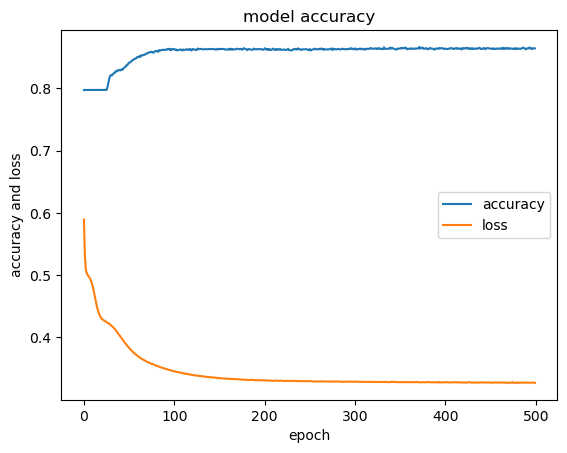

In [24]:
import matplotlib.pyplot as plt
print(history.history['accuracy'])
print(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='best')
plt.show()

In [25]:
### Now we use the trained NNmodel to predict output in X_train sample
NNmodel.evaluate(X_train,Y_train)  ### evaluates the loss and accuracy as specified in the Compiler

250/250 [==============================] - 0s 698us/step - loss: 0.3269 - accuracy: 0.8645


[0.32685568928718567, 0.8644999861717224]

In [26]:
### Now we use the trained NNmodel to predict output in X_train sample -- computing manually via .predict
TE=NNmodel.predict(X_train)  ### note X_train has 8000 data points

250/250 [==============================] - 0s 647us/step


In [27]:
TE.shape

(8000, 1)

In [28]:
h=(TE > 0.5).astype(int) ### Convert TE>0.5 == true ==> 1, False to 0

In [29]:
print(h)
h.shape

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


(8000, 1)

In [30]:
### replace all elements in numpy array of value 0 with value -1
h[h==0]=-1

In [31]:
print(h)
h.shape

[[-1]
 [-1]
 [ 1]
 ...
 [-1]
 [-1]
 [-1]]


(8000, 1)

In [32]:
### replace all elements in numpy array of value 0 with value -1
Y_train1=Y_train
Y_train1[Y_train1==0]=-1

In [33]:
print(Y_train1)

[-1 -1  1 ...  1 -1  1]


In [34]:
Y_train1.shape

(8000,)

In [35]:
J=np.multiply(Y_train1.T,h.T)  ### element by element multiplication.
### Note Y_train1 1 vs fitted h 1 gives +1,Y_train1 -1 vs fitted h -1 gives +1; these are correct predictions
###  but Y_train1 -1 vs fitted h 1 gives -1,Y_train1 -1 vs fitted h 1 gives -1; these are incorrect predictions
c=np.count_nonzero(J > 0) 
print(c,c/8000)

6916 0.8645


In [36]:
### Now we use the trained NNmodel to predict output in X_test sample
NNmodel.evaluate(X_test,Y_test)  ### evaluates the loss and accuracy as specified in the Compiler

63/63 [==============================] - 0s 805us/step - loss: 0.3279 - accuracy: 0.8675


[0.32790276408195496, 0.8675000071525574]

In [37]:
### Now we use the trained NNmodel to predict output in X_test sample -- computing manually via .predict
TE1=NNmodel.predict(X_test)  ### note X_test has 2000 data points

63/63 [==============================] - 0s 861us/step


In [38]:
Y_test1 = np.copy(Y_test)

h1=(TE1 > 0.5).astype(int) ### Convert TE1>0.5 == true ==> 1, False to 0
h1[h1==0]=-1
#Y_test1=Y_test strangely this turns Y_test into Y_test1 later, so we use copy on first line to avoid this
Y_test1[Y_test1==0]=-1
J1=np.multiply(Y_test1.T,h1.T)  ### element by element multiplication
### Note Y_test1 1 vs fitted h 1 gives +1, Y_test1 -1 vs fitted h -1 gives +1; these are correct predictions
###  but Y_train -1 vs fitted h 1 gives -1, Y_test1 -1 vs fitted h 1 gives -1; these are incorrect predictions
c1=np.count_nonzero(J1 > 0) 
print(c1,c1/2000)

1735 0.8675


In [39]:
print(Y_test) ### check that Y_test is not altered

[0 0 0 ... 0 0 0]


Predicting a new case - generalized data

In [40]:
### Now we use the trained weights and biases to try to predict based on a new case
tr=sc.transform([[0, 0, 1, 650, 1, 60, 2, 300000, 2, 1, 0, 80000]])
print(tr)  ### tr.shape is (1,12)

[[-9.98501123e-01 -5.83123916e-01  1.74601919e+00 -3.24425289e-03
   9.15090654e-01  2.01683866e+00 -1.04828130e+00  3.58411758e+00
   8.02256955e-01  6.43760170e-01 -1.02327069e+00 -3.49886744e-01]]


In [41]:
### Example
### Predicting result for Single Observation
print(NNmodel.predict(tr))
### note in each recompute -- this no. will change slightly because of the random initiation of the weights unless we fix
###  the keras random seed as in code line [1]

1/1 [==============================] - 0s 16ms/step
[[0.72948253]]


In [42]:
## Since prob = 0.7295 (> 0.5) of Y=1, yes, prediction of exit within a year

In [43]:
tr1=[[0, 0, 1, 650, 1, 60, 2, 300000, 2, 1, 0, 80000]]

In [44]:
print(NNmodel.predict(tr1)) 
### we get a contrasting wrong result if we do not standardize tr
###  since the trained NN is based on standardized features

1/1 [==============================] - 0s 53ms/step
[[0.0060353]]


Compute Confusion Matrix. Classification Report, and ROC AUC below

In [45]:
### recall TE1=NNmodel.predict(X_test)
import numpy as np
TEf = TE1.flatten() ### convert a 2D numpy array to 1D for input to sklearn
print(TEf)

[0.0397587  0.07301321 0.04221635 ... 0.01421291 0.04618154 0.5515203 ]


In [46]:
hTEf=(TEf > 0.5).astype(int) ### Convert TE1>0.5 == true ==> 1, False to 0
print(hTEf)

[0 0 0 ... 0 0 1]


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, hTEf)
print(confusion_matrix)

[[1535   50]
 [ 215  200]]


In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, hTEf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1585
           1       0.80      0.48      0.60       415

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.85      2000



In [49]:
### rem in keras, TE1=NNmodel.predict(X_test) already gives the predicted probs, TEf is also probs
print(TEf)

[0.0397587  0.07301321 0.04221635 ... 0.01421291 0.04618154 0.5515203 ]


In [50]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, thresholds = metrics.roc_curve(Y_test, TEf)  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_NN = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_NN

0.8747596062483372

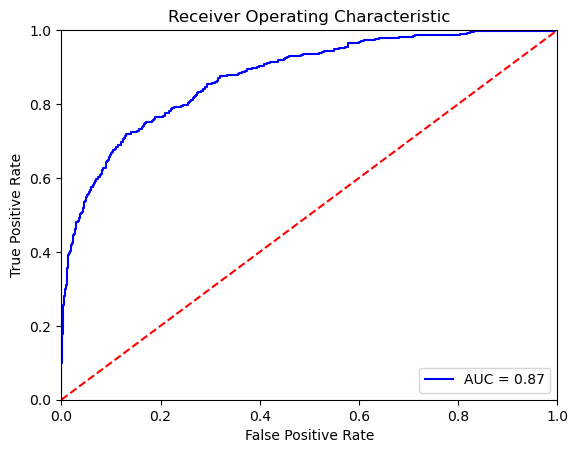

In [51]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_NN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()